In [168]:
import snsql
from snsql import Privacy
import pandas as pd
from pandasql import sqldf
import time

In [169]:
csv_path = 'aac_intakes_outcomes.csv'
meta_path = 'aac_intakes_outcomes.yaml'
dat = pd.read_csv(csv_path)

In [170]:
new_df = dat[['intake_year',
              'age_upon_outcome', 
              'animal_id_outcome',
              'outcome_subtype',
              'outcome_type',
              'sex_upon_outcome',
              'age_upon_outcome_(days)',
              'age_upon_outcome_(years)',
              'outcome_datetime',
              'outcome_weekday',
              'outcome_number',
              'age_upon_intake',
              'animal_id_intake',
              'animal_type',
              'breed',
              'color',
              'found_location',
              'intake_condition',
              'intake_type',
              'sex_upon_intake',
              'age_upon_intake_(days)',
              'age_upon_intake_(years)',
              'intake_datetime',
              'intake_weekday',
              'time_in_shelter_days'
             ]]

In [171]:
new_df = new_df[new_df['animal_type'] == 'Dog']
new_df = new_df[new_df['intake_year'] == 2017]

In [172]:
new_df = new_df.drop(['animal_type', 'intake_year'], axis=1)

In [173]:
new_df

,age_upon_outcome,animal_id_outcome,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),outcome_datetime,outcome_weekday,outcome_number,...,color,found_location,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),age_upon_intake_(years),intake_datetime,intake_weekday,time_in_shelter_days
0,10 years,A006100,NaN,Return to Owner,Neutered Male,3650,10.000000,2017-12-07 14:07:00,Thursday,1.0,...,Yellow/White,Colony Creek And Hunters Trace in Austin (TX),Normal,Stray,Neutered Male,3650,10.000000,2017-12-07 00:00:00,Thursday,0.588194
36,18 years,A251402,NaN,Return to Owner,Spayed Female,6570,18.000000,2017-10-23 11:32:00,Monday,1.0,...,Tan,2905 French Place in Austin (TX),Normal,Stray,Spayed Female,6570,18.000000,2017-10-22 18:41:00,Sunday,0.702083
58,17 years,A285685,NaN,Return to Owner,Neutered Male,6205,17.000000,2017-04-13 11:56:00,Thursday,1.0,...,White/Black,1704 Nelms Dr #1925 in Austin (TX),Normal,Stray,Neutered Male,6205,17.000000,2017-04-12 16:04:00,Wednesday,0.827778
63,15 years,A291843,NaN,Return to Owner,Neutered Male,5475,15.000000,2017-12-12 13:31:00,Tuesday,1.0,...,Brown/Tan,Austin (TX),Normal,Public Assist,Neutered Male,5475,15.000000,2017-12-09 02:11:00,Saturday,3.472222
71,15 years,A297699,NaN,Return to Owner,Neutered Male,5475,15.000000,2017-11-20 15:58:00,Monday,1.0,...,Red Merle,Westgate in Austin (TX),Aged,Stray,Neutered Male,5475,15.000000,2017-11-20 08:11:00,Monday,0.324306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77137,1 year,A764534,NaN,Adoption,Spayed Female,365,1.000000,2018-01-05 16:55:00,Friday,1.0,...,Brown/White,Walnut Drive East And Georgian Drive in Austin...,Normal,Stray,Intact Female,365,1.000000,2017-12-31 16:29:00,Sunday,5.018056
77138,1 year,A764535,Partner,Transfer,Intact Male,365,1.000000,2018-01-04 15:10:00,Thursday,1.0,...,Black,124 West Anderson Lane in Austin (TX),Normal,Stray,Intact Male,365,1.000000,2017-12-31 16:54:00,Sunday,3.927778
77139,2 months,A764536,Foster,Adoption,Spayed Female,60,0.164384,2018-01-25 17:34:00,Thursday,1.0,...,Tan,7Th Street And Chicon in Austin (TX),Normal,Stray,Intact Female,30,0.082192,2017-12-31 17:05:00,Sunday,25.020139
77140,3 months,A764537,Foster,Adoption,Intact Male,90,0.246575,2018-02-13 16:13:00,Tuesday,1.0,...,Brown/White,924 E 51St in Austin (TX),Injured,Stray,Intact Male,30,0.082192,2017-12-31 07:26:00,Sunday,44.365972


In [11]:
privacy = Privacy(epsilon=.0471, delta=0)

In [23]:
meta_path = 'YAMLDataPrivacy.yaml'
reader = snsql.from_df(new_df, privacy=privacy,
metadata=meta_path)
result = reader.execute('SELECT sex_upon_outcome, count(*) FROM MySchema.AnimalShelter group by sex_upon_outcome')


C:\Users\arnav\anaconda3-2\lib\site-packages\snsql\sql\private_reader.py:141: UserWarning: The following columns are of type float: age_upon_outcome_(years), outcome_number, age_upon_intake_(years), time_in_shelter_days. 
summary statistics over floats will use Mechanism.laplace, which is not floating-point safe, 
This could lead to privacy leaks.
  warnings.warn(


In [24]:
result

[['sex_upon_outcome', '???'],
 ['Intact Female', 978],
 ['Intact Male', 1403],
 ['Neutered Male', 3661],
 ['Spayed Female', 3487],
 ['Unknown', 140]]

In [174]:
def query_calc(epsilons, query ):

    errors_list = []
    times_list = []
    values_list = []


    epsilons = epsilons
    for eps in epsilons:
        errors = []
        times = []
        values = []


        privacy = Privacy(epsilon=eps, delta=0)
        meta_path = 'YAMLDataPrivacy.yaml'
        reader = snsql.from_df(new_df, privacy=privacy,
        metadata=meta_path)

        for i in range(10):

            t0 = time.time()
            result = reader.execute(query)
            t1 = time.time()

            result = result[1][0]

            values.append(result)
            times.append(t1-t0)
            errors.append(100 * (result - answer) / answer)

        errors_list.append(errors)
        times_list.append(times)
        values_list.append(values)


    return errors_list, times_list

In [25]:
query = "SELECT sex_upon_outcome, count(*) FROM new_df group by sex_upon_outcome"
df_query = sqldf(query)
df_query

,sex_upon_outcome,count(*)
0,Intact Female,1069
1,Intact Male,1287
2,Neutered Male,3946
3,Spayed Female,3487
4,Unknown,62


In [165]:
privacy = Privacy(epsilon=.99, delta=0)
meta_path = 'YAMLDataPrivacy.yaml'
reader = snsql.from_df(new_df, privacy=privacy,
metadata=meta_path)
result = reader.execute("SELECT count(*) FROM MySchema.AnimalShelter")



/Users/kelsey/.pyenv/versions/3.10.8/lib/python3.10/site-packages/snsql/sql/private_reader.py:141: UserWarning: The following columns are of type float: age_upon_outcome_(years), outcome_number, age_upon_intake_(years), time_in_shelter_days. 
summary statistics over floats will use Mechanism.laplace, which is not floating-point safe, 
This could lead to privacy leaks.
  warnings.warn(


In [166]:
result

[['???'], [9861]]

In [160]:
query = "select count(*) from (select distinct * from new_df)"
df_query = sqldf(query)
df_query

,count(*)
0,9846


In [150]:
query = "select animal_id_outcome, count(*) from new_df group by 1 having count(*) > 2 "
df_query = sqldf(query)
df_query

,animal_id_outcome,count(*)
0,A524092,3
1,A559953,3
2,A561853,3
3,A615920,5
4,A629344,3
...,...,...
128,A760970,3
129,A761100,3
130,A761107,3
131,A761936,4


In [173]:
query = "select animal_id_outcome, count(*) from new_df group by 1 having count(*) > 2 order by 2 DESC "
df_query = sqldf(query)
df_query

,animal_id_outcome,count(*)
0,A738324,6
1,A741582,5
2,A735601,5
3,A721033,5
4,A665334,5
...,...,...
128,A633994,3
129,A629344,3
130,A561853,3
131,A559953,3


In [32]:
query = "select count(*) from (select distinct * from new_df)"
df_query = sqldf(query)
answer = df_query.iloc[0][0]
answer

9846

In [190]:
query = "select breed, count(*) from (select distinct * from new_df) group by breed order by count(*)"
df_query = sqldf(query)
df_query

,breed,count(*)
0,Afghan Hound/Labrador Retriever,1
1,Airedale Terrier Mix,1
2,Akita/Australian Cattle Dog,1
3,Akita/Belgian Malinois,1
4,Akita/Mastiff,1
...,...,...
683,Australian Cattle Dog Mix,226
684,German Shepherd Mix,485
685,Chihuahua Shorthair Mix,1041
686,Labrador Retriever Mix,1341


In [175]:
query = "select avg(time_in_shelter_days) from (select distinct * from new_df)"
df_query = sqldf(query)
df_query
answer = df_query.iloc[0][0]
answer

13.617055643013563

In [176]:
def query_calc(epsilons, query ):

    errors_list = []
    times_list = []
    values_list = []


    epsilons = epsilons
    for eps in epsilons:
        errors = []
        times = []
        values = []


        privacy = Privacy(epsilon=eps, delta=0)
        meta_path = 'YAMLDataPrivacy.yaml'
        reader = snsql.from_df(new_df, privacy=privacy,
        metadata=meta_path)

        for i in range(10):

            t0 = time.time()
            result = reader.execute(query)
            t1 = time.time()

            result = result[1][0]

            values.append(result)
            times.append(t1-t0)
            errors.append(100 * (result - answer) / answer)

        errors_list.append(errors)
        times_list.append(times)
        values_list.append(values)


    return errors_list, times_list


In [39]:
errors_list_overall_count, times_list_overall_count = query_calc(epsilons = [.005, .01, .015, .02, .025] , query = "SELECT count(*) FROM MySchema.AnimalShelter" )
#errors_list_breed_count, times_list_breed_count = query_calc(epsilons = [.01, .02, .03, .04, .05], query = "SELECT breed, count(*) FROM MySchema.AnimalShelter group by breed")

C:\Users\arnav\anaconda3-2\lib\site-packages\snsql\sql\private_reader.py:141: UserWarning: The following columns are of type float: age_upon_outcome_(years), outcome_number, age_upon_intake_(years), time_in_shelter_days. 
summary statistics over floats will use Mechanism.laplace, which is not floating-point safe, 
This could lead to privacy leaks.
  warnings.warn(
C:\Users\arnav\anaconda3-2\lib\site-packages\snsql\sql\private_reader.py:141: UserWarning: The following columns are of type float: age_upon_outcome_(years), outcome_number, age_upon_intake_(years), time_in_shelter_days. 
summary statistics over floats will use Mechanism.laplace, which is not floating-point safe, 
This could lead to privacy leaks.
  warnings.warn(
C:\Users\arnav\anaconda3-2\lib\site-packages\snsql\sql\private_reader.py:141: UserWarning: The following columns are of type float: age_upon_outcome_(years), outcome_number, age_upon_intake_(years), time_in_shelter_days. 
summary statistics over floats will use Mech

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U31'), dtype('<U31')) -> dtype('<U31')

In [91]:
result = reader.execute("SELECT breed, count(*) FROM MySchema.AnimalShelter group by breed")
#result

#df_query['count(*)'].shape
#type(df_query['count(*)'].tolist())
#df_query['count(*)'].tolist()
result2 = result[1:]

In [186]:
df2 = df_query.values.tolist()

In [108]:
breed_error_list = []

for i in range(len(result2)):
    breed_error_list.append(100 * ((result2[i][1] - df2[i][1]) / df2[i][1]))
    
avg_error = sum(breed_error_list)/len(breed_error_list)
avg_error
#breed_error_list

-850.6969131099669

In [187]:
def query_calc2(epsilons, query):

    errors_list = []
    times_list = []
    values_list = []


    epsilons = epsilons
    for eps in epsilons:
        errors = []
        times = []
        values = []


        privacy = Privacy(epsilon=eps, delta=0)
        meta_path = 'YAMLDataPrivacy.yaml'
        reader = snsql.from_df(new_df, privacy=privacy,
        metadata=meta_path)

        for i in range(10):

            t0 = time.time()
            result = reader.execute(query)
            t1 = time.time()

            result2 = result[1:]
            df2 = df_query.values.tolist()
            
            breed_error_list = []

            for i in range(len(result2)):
                breed_error_list.append(100 * ((result2[i][1] - df2[i][1]) / df2[i][1]))
    
            avg_error = sum(breed_error_list)/len(breed_error_list)
            avg_error

            
            times.append(t1-t0)
            errors.append(avg_error)

        errors_list.append(errors)
        times_list.append(times)


    return errors_list, times_list


In [192]:
privacy = Privacy(epsilon=0.2, delta=0)
meta_path = 'YAMLDataPrivacy.yaml'
reader = snsql.from_df(new_df, privacy=privacy,
metadata=meta_path)
reader.execute("SELECT breed, count(*) as ct FROM MySchema.AnimalShelter group by breed order by ct")

C:\Users\arnav\anaconda3-2\lib\site-packages\snsql\sql\private_reader.py:141: UserWarning: The following columns are of type float: age_upon_outcome_(years), outcome_number, age_upon_intake_(years), time_in_shelter_days. 
summary statistics over floats will use Mechanism.laplace, which is not floating-point safe, 
This could lead to privacy leaks.
  warnings.warn(


[['breed', 'ct'],
 ['Labrador Retriever/Miniature Poodle', -143],
 ['Rat Terrier/Border Collie', -121],
 ['Catahoula/Harrier', -98],
 ['Samoyed Mix', -97],
 ['Labrador Retriever/Queensland Heeler', -95],
 ['Shih Tzu/Dachshund', -95],
 ['Yorkshire Terrier/Chihuahua Shorthair', -93],
 ['Catahoula/Australian Cattle Dog', -91],
 ['Cardigan Welsh Corgi/Beagle', -89],
 ['Bullmastiff Mix', -87],
 ['Labrador Retriever/Border Collie', -86],
 ['St. Bernard Rough Coat', -85],
 ['Catahoula/American Pit Bull Terrier', -84],
 ['Yorkshire Terrier/Pomeranian', -83],
 ['Golden Retriever/Catahoula', -81],
 ['Belgian Malinois/Treeing Cur', -79],
 ['German Shepherd/Redbone Hound', -79],
 ['Standard Poodle Mix', -77],
 ['Labrador Retriever/Vizsla', -76],
 ['Pit Bull/French Bulldog', -75],
 ['Beagle/Chinese Sharpei', -74],
 ['English Bulldog', -74],
 ['Rat Terrier/Smooth Fox Terrier', -72],
 ['Shiba Inu Mix', -71],
 ['Cairn Terrier/Dachshund', -70],
 ['Australian Cattle Dog/Staffordshire', -69],
 ['Pekinges

Text(0, 0.5, 'error (%)')

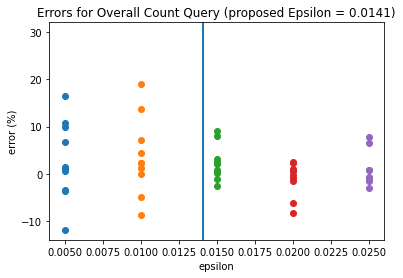

In [118]:
import matplotlib.pyplot as plt
import numpy as np

epsilons_overall_count = [.005, .01, .015, .02, .025] 
for xe, ye in zip(epsilons_overall_count, errors_list_overall_count):
    plt.scatter([xe] * len(ye), ye)
    plt.axline((0.0141, 0), (0.0141, 30))
plt.title('Errors for Overall Count Query (proposed Epsilon = 0.0141)')
plt.xlabel('epsilon')
plt.ylabel('error (%)')

Text(0, 0.5, 'seconds')

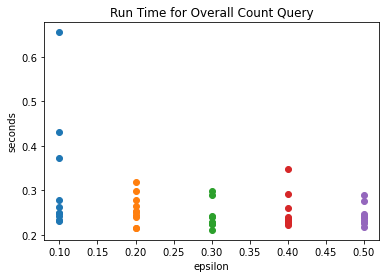

In [121]:
for xe, ye in zip(epsilons_overall_count, times_list_overall_count ):
    plt.scatter([xe] * len(ye), ye)
plt.title('Run Time for Overall Count Query')
plt.xlabel('epsilon')
plt.ylabel('seconds')

In [ ]:
errors_list, times_list = query_calc(epsilons = [.005, .01, .015, .02, .025] , query = "SELECT count(*) FROM MySchema.AnimalShelter" )

In [188]:
errors_list2, times_list2 = query_calc2(epsilons = [.1, .2, .3, .4, .5] , query = "SELECT breed, count(*) as ct FROM MySchema.AnimalShelter group by breed having ct > 5")

C:\Users\arnav\anaconda3-2\lib\site-packages\snsql\sql\private_reader.py:141: UserWarning: The following columns are of type float: age_upon_outcome_(years), outcome_number, age_upon_intake_(years), time_in_shelter_days. 
summary statistics over floats will use Mechanism.laplace, which is not floating-point safe, 
This could lead to privacy leaks.
  warnings.warn(


IndexError: list index out of range

In [124]:
query = "select avg(time_in_shelter_days) from (select distinct * from new_df)"
df_query = sqldf(query)
answer = df_query.iloc[0][0]
answer

13.617055643013563

In [167]:
result = reader.execute("select avg(time_in_shelter_days) from MySchema.AnimalShelter")
result

ValueError: Attempting to query an unbounded column

In [163]:
errors_list3, times_list3 = query_calc(epsilons = [0.2, 0.4, 0.6, 0.8, 0.99] , query = "SELECT avg(time_in_shelter_days) FROM MySchema.AnimalShelter")

C:\Users\arnav\anaconda3-2\lib\site-packages\snsql\sql\private_reader.py:141: UserWarning: The following columns are of type float: age_upon_outcome_(years), outcome_number, age_upon_intake_(years), time_in_shelter_days. 
summary statistics over floats will use Mechanism.laplace, which is not floating-point safe, 
This could lead to privacy leaks.
  warnings.warn(
C:\Users\arnav\anaconda3-2\lib\site-packages\snsql\sql\private_reader.py:141: UserWarning: The following columns are of type float: age_upon_outcome_(years), outcome_number, age_upon_intake_(years), time_in_shelter_days. 
summary statistics over floats will use Mechanism.laplace, which is not floating-point safe, 
This could lead to privacy leaks.
  warnings.warn(
C:\Users\arnav\anaconda3-2\lib\site-packages\snsql\sql\private_reader.py:141: UserWarning: The following columns are of type float: age_upon_outcome_(years), outcome_number, age_upon_intake_(years), time_in_shelter_days. 
summary statistics over floats will use Mech

Text(0, 0.5, 'error (%)')

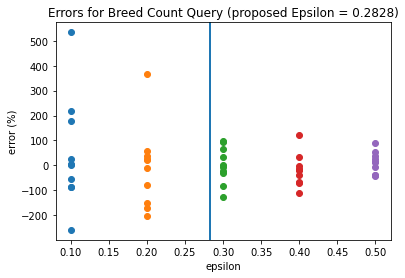

In [181]:
epsilons_overall_count = [.1, .2, .3, .4, .5] 
for xe, ye in zip(epsilons_overall_count, errors_list2):
    plt.scatter([xe] * len(ye), ye)
    plt.axline((0.2828, 0), (0.2828, 30))
plt.title('Errors for Breed Count Query (proposed Epsilon = 0.2828)')
plt.xlabel('epsilon')
plt.ylabel('error (%)')

Text(0, 0.5, 'seconds')

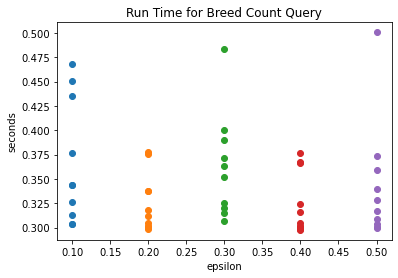

In [120]:
for xe, ye in zip(epsilons_overall_count, times_list2 ):
    plt.scatter([xe] * len(ye), ye)
plt.title('Run Time for Breed Count Query')
plt.xlabel('epsilon')
plt.ylabel('seconds')

Text(0, 0.5, 'error (%)')

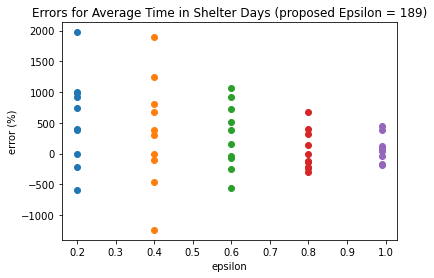

In [164]:
epsilons_overall_count = [.2, .4, .6, .8, .99] 
for xe, ye in zip(epsilons_overall_count, errors_list3):
    plt.scatter([xe] * len(ye), ye)
plt.title('Errors for Average Time in Shelter Days (proposed Epsilon = 189.5)')
plt.xlabel('epsilon')
plt.ylabel('error (%)')